## Modelação do Random Forest com Cross Validation


 1. IMPORTAÇÃO DAS BIBLIOTECAS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold


**Leitura dos datasets preparados**

In [2]:
train_df = pd.read_csv("train_data_prepared.csv", encoding="latin-1",keep_default_na=False, na_values=['NULL', ''])  
test_df = pd.read_csv("test_data_prepared.csv", encoding="latin-1",keep_default_na=False, na_values=['NULL', ''])

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 1   AVERAGE_TIME_DIFF        6812 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 3   LUMINOSITY               6812 non-null   int64  
 4   AVERAGE_TEMPERATURE      6812 non-null   float64
 5   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 6   AVERAGE_HUMIDITY         6812 non-null   float64
 7   AVERAGE_WIND_SPEED       6812 non-null   float64
 8   AVERAGE_CLOUDINESS       6812 non-null   int64  
 9   RAIN_INTENSITY           6812 non-null   int64  
 10  record_date_year         6812 non-null   int64  
 11  record_date_month        6812 non-null   int64  
 12  record_date_day          6812 non-null   int64  
 13  record_date_hour         6812 non-null   int64  
 14  day_of_week             

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 1   AVERAGE_TIME_DIFF        1500 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 3   LUMINOSITY               1500 non-null   int64  
 4   AVERAGE_TEMPERATURE      1500 non-null   float64
 5   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 6   AVERAGE_HUMIDITY         1500 non-null   float64
 7   AVERAGE_WIND_SPEED       1500 non-null   float64
 8   AVERAGE_CLOUDINESS       1500 non-null   int64  
 9   RAIN_INTENSITY           1500 non-null   int64  
 10  record_date_year         1500 non-null   int64  
 11  record_date_month        1500 non-null   int64  
 12  record_date_day          1500 non-null   int64  
 13  record_date_hour         1500 non-null   int64  
 14  day_of_week             

In [5]:
print("Tamanho do treino:", train_df.shape)
print("Tamanho do teste:", test_df.shape)

Tamanho do treino: (6812, 33)
Tamanho do teste: (1500, 32)


**Separação das features e do target**

In [6]:

X = train_df.drop(columns=["AVERAGE_SPEED_DIFF"])
y = train_df["AVERAGE_SPEED_DIFF"]



**Definição do modelo e cross validation**

In [ ]:
class_weights = {
    0: 3.040,     
    1: 5.055,     
    2: 4.412,
    3: 5.488,
    4: 15.519     
}

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight=class_weights,
    max_features= "sqrt",
    min_samples_leaf= 2,
    min_samples_split= 2,
    n_jobs=-1
)

# configuração da validação cruzada (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliação via accuracy
scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy", n_jobs=-1)


# Avaliação via F1 Macro
f1_scores = cross_val_score(
    model,
    X,
    y,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1
)

print("Accuracy por fold:", scores)
print("Média:", scores.mean())
print("Desvio padrão:", scores.std())

print("F1 Macro por fold:", f1_scores)
print("Média F1 Macro:", f1_scores.mean())
print("Desvio padrão F1 Macro:", f1_scores.std())

Accuracy por fold: [0.81144534 0.79677183 0.79955947 0.78487518 0.81057269]
Média: 0.800644902031129
Desvio padrão: 0.009798707018149548
F1 Macro por fold: [0.79999291 0.79453377 0.79091307 0.77871555 0.80647335]
Média F1 Macro: 0.7941257301500806
Desvio padrão F1 Macro: 0.009325757187698517


**Treino do modelo final**

In [8]:

model.fit(X,y)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Previsões no dataset de teste**

In [9]:
y_test_pred = model.predict(test_df)

In [ ]:
# Mapeamento inverso (0-4 para as categorias originais)
reverse_mapping = {
    0: "None",
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very_High"
}

y_test_labels = pd.Series(y_test_pred).map(reverse_mapping)

**Criação do ficheiro de submissão para o Kaggle**

In [11]:
submission = pd.DataFrame({
    "RowId": range(1, len(test_df) + 1),
    "Speed_Diff": y_test_labels
})

submission.to_csv("submission.csv", index=False)
print("\nFicheiro 'submission.csv' criado com sucesso!")


Ficheiro 'submission.csv' criado com sucesso!


**Ver a importância das features**


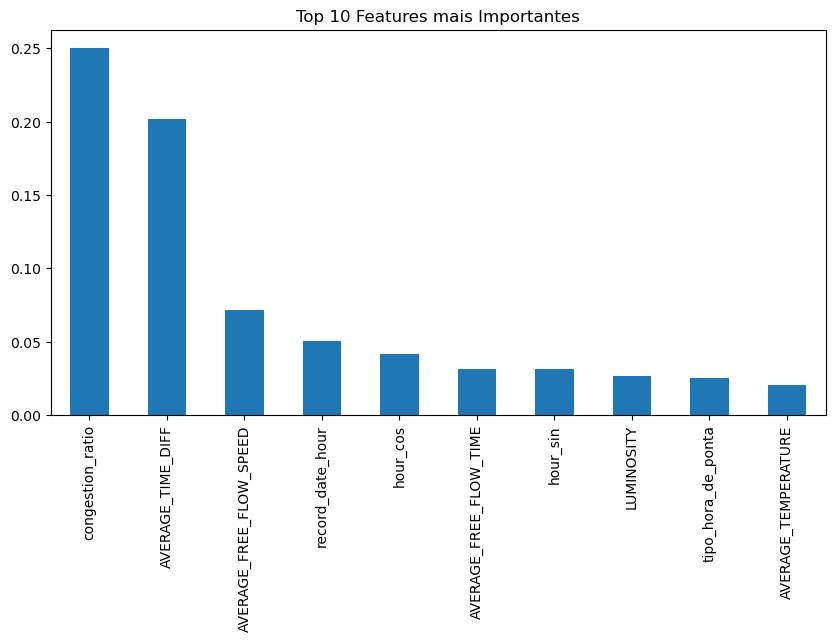

In [12]:
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
importances.head(10).plot(kind="bar")
plt.title("Top 10 Features mais Importantes")
plt.show()

Accuracy Kaggle: 0.80444